In [21]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy as idx # to read the idx files

In [22]:
'''
http://yann.lecun.com/exdb/mnist/
    
download these files:
train-images-idx3-ubyte.gz:  training set images (9912422 bytes) 
train-labels-idx1-ubyte.gz:  training set labels (28881 bytes) 
t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes) 
t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes)
    
unzip them they will be in an '.idx3-ubyte' file 
'''
# folder containing data
folder = 'C:\\Users\\jmluc\\Documents\\capstone\\mnist-digits\\data\\'

In [23]:
# read the data
train_images = idx.convert_from_file(folder + 'train-images.idx3-ubyte')
train_labels = idx.convert_from_file(folder + 'train-labels.idx1-ubyte')

test_images = idx.convert_from_file(folder + 't10k-images.idx3-ubyte')
test_labels = idx.convert_from_file(folder + 't10k-labels.idx1-ubyte')

In [24]:
# functions to change dimension, 
# keras cnn requires increased dimension
# plotting requires reducing
def increase_dimension(np_array):
    return np_array.reshape(np_array.shape[0], 28, 28, 1)

def reduce_dimension(np_array):
    return np_array.reshape(np_array.shape[0], 28, 28)

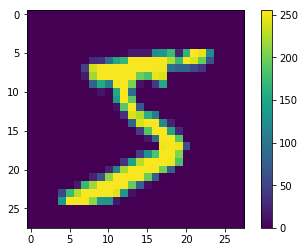

In [25]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [26]:
train_labels[0]

5

In [31]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [32]:
train_images.shape

(60000, 28, 28)

In [33]:
test_images.shape

(10000, 28, 28)

In [34]:
# normalize values
train_images = train_images / 255.0

test_images = test_images / 255.0

C:\Users\jmluc\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


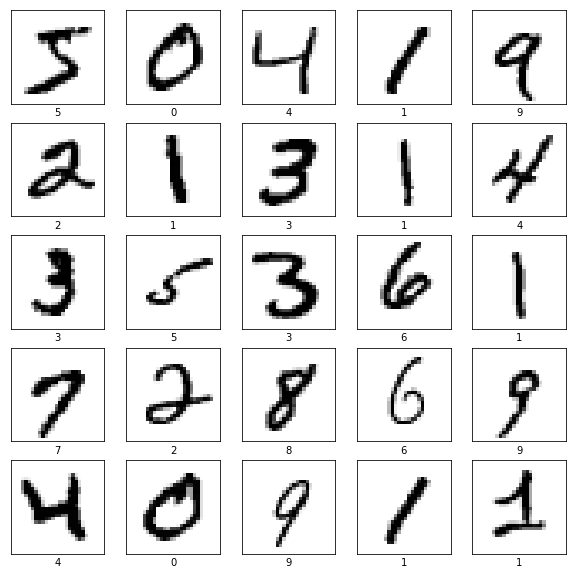

In [10]:
# display first few images with class label

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [35]:
# 1) define model architecture / topology

model = keras.Sequential([
    keras.layers.Conv2D(8, kernel_size=(5,5), strides=(2, 2), input_shape=(28,28, 1), use_bias=True),
    keras.layers.Conv2D(8, kernel_size=(3,3), strides=(1, 1), use_bias=True),  
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation=tf.nn.relu),   
    keras.layers.Dense(32, activation=tf.nn.relu),   
    keras.layers.Dense(10, activation=tf.nn.softmax) 
]) 

In [36]:
# 2) compile

model.compile(optimizer=tf.train.AdamOptimizer(),      # strategy
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
# increase dimension for input into cnn
train_images = increase_dimension(train_images)
test_images = increase_dimension(test_images)

In [38]:
# 3) train
model.fit(train_images, train_labels, epochs=5)
    # there is a 'right' answer to number of epochs- MUST be set properly
    # how long should we train this network?

Epoch 1/5
60000/60000 [==============================] - 12s 200us/step - loss: 0.2593 - acc: 0.9204
Epoch 2/5
60000/60000 [==============================] - 12s 192us/step - loss: 0.1210 - acc: 0.9638
Epoch 3/5
60000/60000 [==============================] - 12s 197us/step - loss: 0.0943 - acc: 0.9710
Epoch 4/5
60000/60000 [==============================] - 12s 197us/step - loss: 0.0797 - acc: 0.9752
Epoch 5/5
60000/60000 [==============================] - 12s 204us/step - loss: 0.0689 - acc: 0.9783


In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)
print('accuracy:', test_acc)
print('loss:', test_loss)

10000/10000 [==============================] - 1s 70us/step
accuracy: 0.9752
loss: 0.0845864770229


In [40]:
wrong = []
for i in range(len(test_images)):
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if not predicted_label == true_label:
        wrong.append(i)

In [41]:
test_images = reduce_dimension(test_images)

In [42]:
# number of errors
len(wrong)

248

C:\Users\jmluc\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


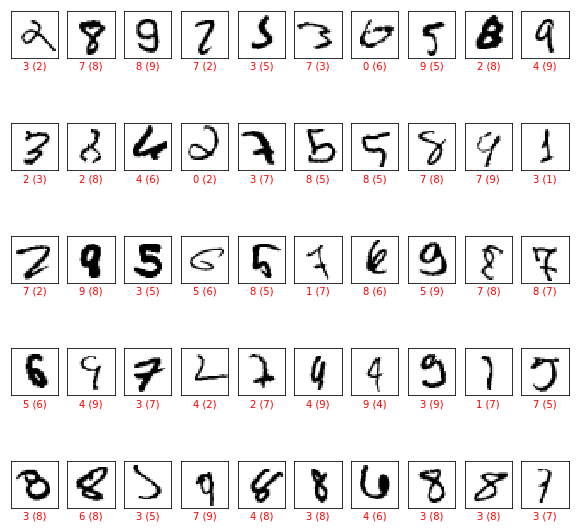

In [43]:
# plot first few incorrect images with predicted (actual) label
test_images = reduce_dimension(test_images)

plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[wrong[i]], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[wrong[i]])
    true_label = test_labels[wrong[i]]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(predicted_label,
                               true_label),
                               color=color)